# Parte 1

In this part we access to wikipedia link and read the table whit **Postal Code of Toronto**. Next we clean the data and combine the same Postal Code in one row, the main objective is achieved a panda Dataframe similar to the following figure:

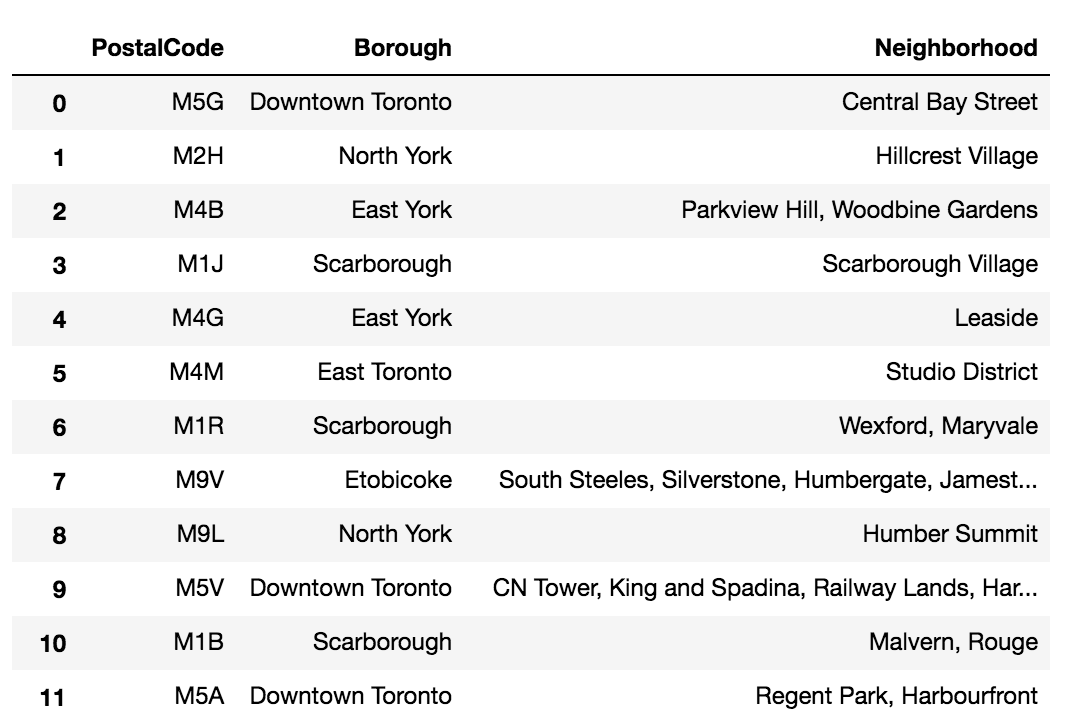

In [2]:
# Import pandas library and read the data from the wikipedia link

import pandas as pd

canada = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=862527922', index_col=None)
print(type(canada))
print(len(canada))

<class 'list'>
3


We can see the object *canada* is an list with three element, one per each table in wikipedia web page, the table that is your interest in position one, and is the one we are going to read as a pandas dataframe

In [3]:
# Read pandas data frame

canada_df = pd.DataFrame(canada[0])
print(canada_df.shape)
canada_df.head(10)


(289, 3)


,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


Next we remove **Borough** that have **Not assigned** to ignore this records in the analysis

In [4]:
# Remove Borough wiht 'Not assigned' 

canada_assig = canada_df['Borough'] != 'Not assigned'
canada_df = canada_df[canada_assig]
print(canada_df.shape)
canada_df.head(10)

(212, 3)


,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern


The next step is to **combine** in a single row, separating neighborhoods that have repeated postal codes with a comma (,)

In [5]:
# Combine records

canada_df.set_index(['Postcode','Borough'], inplace=True)
canada_clean = canada_df.groupby(level=['Postcode','Borough'], sort=False).agg(', '.join)

canada_clean.reset_index( inplace=True)
canada_clean.head(12)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Not assigned
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens, Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson, Garden District"


In [6]:
canada_clean['Neighbourhood'].describe()

count                                                 103
unique                                                103
top       Bathurst Manor, Downsview North, Wilson Heights
freq                                                    1
Name: Neighbourhood, dtype: object

We can see that all cell in column **Neighbourhood** are asigned. Whit this we ***finish the load and clean process*** of postal code table. In the next command line we use **.shape** method to print the number of row and column of dataframe

In [75]:
canada_clean.shape

(103, 3)

We obtained a dataframe with 103 rows and 3 columns

# End of the Part 1

# Part 2#

In the second part of capstone projects, the idea is to assign the geographic coordinates to each postal code in the pandas dataframe, prepared in the part 1.

In order to make this activity, in the intructions they give two opcions, these are: **"Use the Geocoder package or the csv file to create the following dataframe".**

I  opted to use the csv file, and in the folliwgns code line I explain the process.

The result of this part of the capstone project is to arrive at a datafreme similar to the one shown in the following figure:

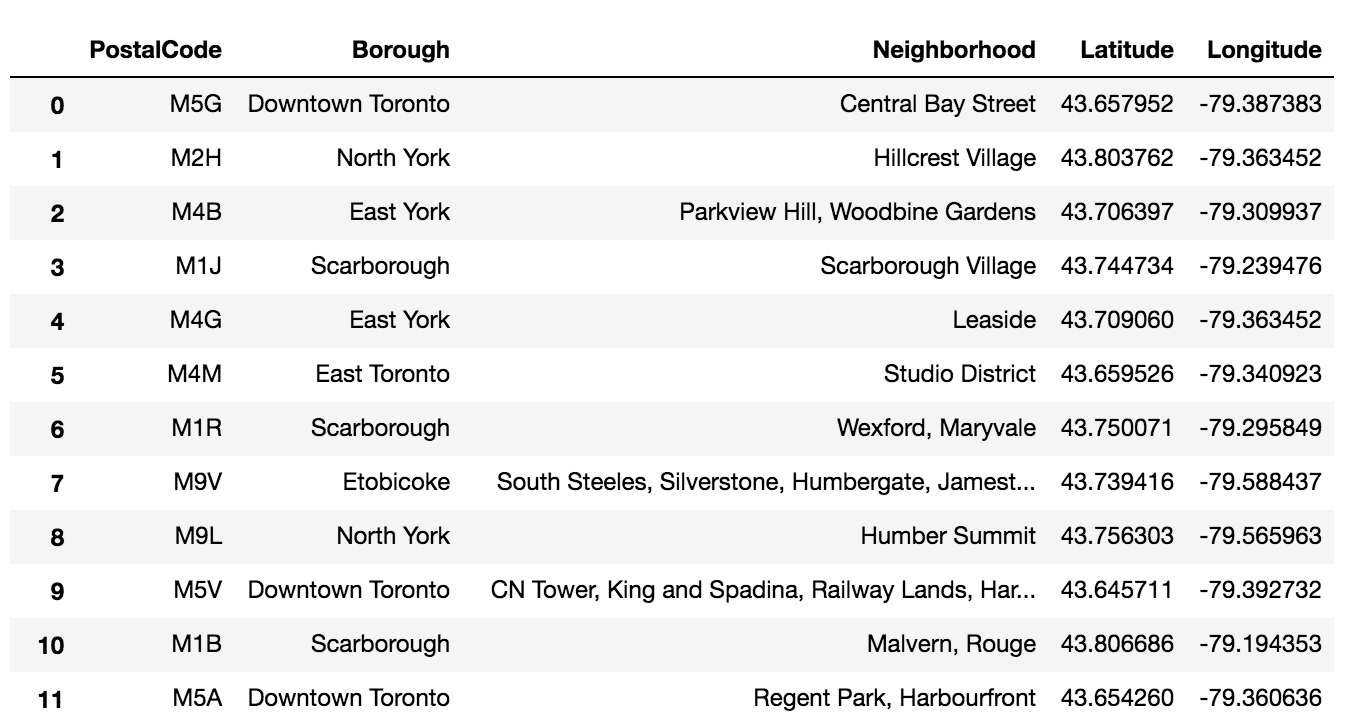

In [8]:
# The code was removed by Watson Studio for sharing.

In [9]:
# The code was removed by Watson Studio for sharing.

In [10]:
# Read csv file with the coordinates of the postal codes
file
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

client_e450a938a70e418fbcb0d928b7258319 = ibm_boto3.client(service_name=name,
    ibm_api_key_id = key_id,
    ibm_auth_endpoint = end_point,
    config=Config(signature_version = version),
    endpoint_url = url)

body = client_e450a938a70e418fbcb0d928b7258319.get_object(Bucket = Buck,Key = key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
cod_post_coord = pd.read_csv(body)
cod_post_coord.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [78]:
canada_clean.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Not assigned


Comparing the data frames **"canada_clean"** and **"cod_post_coord"** it is observed that the key column that will be used to join the files using the merge() method, have different names, so the first step will be to rename the **"Post Code"** column as a new name **"Postcode"**. Later, using the merge() method, we will unite both dataframes into one, which will have all the necessary information to complete part three of the assignment.

In [12]:
# Reanme 'Postal Code' by 'Postcode'

cod_post_coord.rename(columns={'Postal Code': 'Postcode'}, inplace=True)
cod_post_coord.head(2)

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497


In [13]:
# Creation of the dataframe with all information

canada_all = pd.merge(canada_clean, cod_post_coord, on= 'Postcode')

canada_all.head(12)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Not assigned,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


we can see hoe the dataframe complies with the structure requested in the instructions of the capstone project

# End of the Part 2

# Part 3

In this part of **Capstone Project** we go to replicate the same analysis made with New York City data in the Lab.

First I make a frequency distribution of **"Borough" variable**, to decide if I am going to work only with the records that contain the word **"Toronto"** or with all the data.

In [125]:
# This next code line create a column, with 1 if 'Borough' contain "Toronto" and O if not

canada_all['only_Toront'] = (canada_all['Borough'].apply(lambda Borough: str.find(Borough, 'Toronto'))>0)

# Proportion of records with contains "Toronto"
p = canada_all['only_Toront'].sum()/ canada_all['only_Toront'].shape[0]

# Number of records with contains "Toronto" 
s = canada_all['only_Toront'].sum()

print('The proportion of records with contains "Toronto" is: ', p)

print('The number of records with contains "Toronto" is: ', s)

canada_all_toronto = canada_all[canada_all['only_Toront'] == 1]
canada_all_toronto.drop(['only_Toront'], axis = 1, inplace = True)
canada_all_toronto.reset_index(drop = True, inplace=True)
print(canada_all_toronto.shape)
canada_all_toronto.head()

The proportion of records with contains "Toronto" is:  0.36893203883495146
The number of records with contains "Toronto" is:  38
(38, 5)


,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
1,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


Although it is observed that there are not many records that contain **"Toronto"** (only 38 that represent about 37% of the records), we are going to apply the cluster algorithm only to these records, this for the purpose of visualizing the results in the maps we generate.

In [90]:
# Import library required

import numpy as np
import pandas as pd
import json
import requests
from pandas.io.json import json_normalize
import matplotlib as plt
import matplotlib.cm as cm
import matplotlib.colors as plt
!conda install -c conda-forge folium=0.5.0 --yes
import folium
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
print()
print("***********************************")
print('Libraries imported.')
print("***********************************")


Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.21.0-py_0 conda-forge


geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.21.0         | 58 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executi

We use geopy library to get the latitude and longitude values of **Toronto City**.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent to_explorer, as shown below.

In [91]:
address = 'Toronto City, CA'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


We create a map of Toronto with neighborhoods superimposed on top. 
Note: Only we create the map to ***Boroughs selected***

In [126]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(canada_all_toronto['Latitude'], 
                                           canada_all_toronto['Longitude'],
                                           canada_all_toronto['Borough'],
                                           canada_all_toronto['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Define Foursquare Credentials and Vision.
Important: ***for privacy reasons the credentials are hidden***

In [139]:
# The code was removed by Watson Studio for sharing.

In the **Lab** we explore the first neighborhood, because the latitude and longitude were associate with them. In the Capstone Project, the values of latitude and longitude, are associate wiht **Postal Code**, so it is this feature that will be used to associate the venues from the Foursquere API.

Let's explore the firts **Postal Code** in our dataframe 

In [156]:
canada_all_toronto.loc[0,'Postcode']

'M5A'

In the **Lab** we explore the first neighborhood, because the latitude anda logitude were associate whit th

Get the **Post Code** latitude and longitude values.

In [137]:
postcode_latitude = canada_all_toronto.loc[0, 'Latitude'] # Post Code latitude value
postcode_longitude = canada_all_toronto.loc[0, 'Longitude'] # Post Code longitude value

postcode_name = canada_all_toronto.loc[0, 'Postcode'] # Post Code name

print('Latitude and longitude values of {} are {}, {}.'.format(postcode_name, 
                                                               postcode_latitude, 
                                                               postcode_longitude))

Latitude and longitude values of M5A are 43.6542599, -79.3606359.


#### Now, let's get the top 100 venues that are in M5A Post Code within a radius of 500 meters.

First, let's create the GET request URL. Name your URL url.

In [154]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    postcode_latitude, 
    postcode_longitude, 
    radius, 
    LIMIT)
print('*****************************************************************************************')
print('For privacy reasons the "url" not printing, because would show the private ID credentials') # display URL
print('*****************************************************************************************')

*****************************************************************************************
For privacy reasons the "url" not printing, because would show the private ID credentials
*****************************************************************************************


Send the GET request and examine the resutls

In [143]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eac9ddc216785001b0fb07a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 48,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
 

In [144]:
results['response']['groups'][0]

{'type': 'Recommended Places',
 'name': 'recommended',
 'items': [{'reasons': {'count': 0,
    'items': [{'summary': 'This spot is popular',
      'type': 'general',
      'reasonName': 'globalInteractionReason'}]},
   'venue': {'id': '54ea41ad498e9a11e9e13308',
    'name': 'Roselle Desserts',
    'location': {'address': '362 King St E',
     'crossStreet': 'Trinity St',
     'lat': 43.653446723052674,
     'lng': -79.3620167174383,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.653446723052674,
       'lng': -79.3620167174383}],
     'distance': 143,
     'postalCode': 'M5A 1K9',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['362 King St E (Trinity St)',
      'Toronto ON M5A 1K9',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d16a941735',
      'name': 'Bakery',
      'pluralName': 'Bakeries',
      'shortName': 'Bakery',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food

In [145]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we clean the json file and structure it into a *pandas* dataframe.

In [146]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1) #get_category_type

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149
3,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
4,Body Blitz Spa East,Spa,43.654735,-79.359874


And how many venues were returned by Foursquare?

In [147]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

48 venues were returned by Foursquare.


##Explore Postal Code in Toronto

We adapt the function created in the Lab to repeat the same process to all the neighborhoods in Manhattan, to made the same in the Postal Codes of Toronto

In [148]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        #results['response']['groups'][0]
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postcode', 
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [149]:
toronto_venues = getNearbyVenues(names=canada_all_toronto['Postcode'],
                                   latitudes=canada_all_toronto['Latitude'],
                                   longitudes=canada_all_toronto['Longitude']
                                  )

M5A
M5B
M5C
M4E
M5E
M5G
M6G
M5H
M6H
M5J
M6J
M4K
M5K
M6K
M4L
M5L
M4M
M4N
M5N
M4P
M5P
M6P
M4R
M5R
M6R
M4S
M5S
M6S
M4T
M5T
M4V
M5V
M4W
M5W
M4X
M5X
M4Y
M7Y


### Let's check the size of the resulting dataframe

In [152]:
print(toronto_venues.shape)
toronto_venues.head()

(1585, 7)


,Postcode,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M5A,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,M5A,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,M5A,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,M5A,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,M5A,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


### Let's check how many venues were returned for each Postal Code

In [153]:
toronto_venues.groupby('Postcode').count()

,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postcode,,,,,,
M4E,4,4,4,4,4,4
M4K,43,43,43,43,43,43
M4L,20,20,20,20,20,20
M4M,41,41,41,41,41,41
M4N,4,4,4,4,4,4
M4P,8,8,8,8,8,8
M4R,20,20,20,20,20,20
M4S,36,36,36,36,36,36
M4T,1,1,1,1,1,1


### Let's find out how many unique categories can be curated from all the returned venues

In [157]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 230 uniques categories.


### Analyze Each Postal Code

In [159]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Postcode'] = toronto_venues['Postcode'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Postcode,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### And let's examine the new dataframe size.

In [160]:
toronto_onehot.shape

(1585, 231)

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [161]:
toronto_grouped = toronto_onehot.groupby('Postcode').mean().reset_index()
toronto_grouped

,Postcode,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,M4E,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,M4K,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.00,...,0.000000,0.023256,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256
2,M4L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,M4M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048780,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.024390,0.000000,0.000000,0.024390
4,M4N,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,M4P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,M4R,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000
7,M4S,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.00,...,0.027778,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,M4T,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,M4V,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.00,...,0.000000,0.000000,0.00,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000


### Let's confirm the new size

In [162]:
toronto_grouped.shape

(38, 231)

### Let's print each **Post Code** along with the top 5 most common venues

In [163]:
num_top_venues = 5

for hood in toronto_grouped['Postcode']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Postcode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----M4E----
               venue  freq
0       Neighborhood  0.25
1              Trail  0.25
2  Health Food Store  0.25
3                Pub  0.25
4             Museum  0.00


----M4K----
                venue  freq
0    Greek Restaurant  0.19
1         Coffee Shop  0.09
2  Italian Restaurant  0.07
3           Bookstore  0.05
4      Ice Cream Shop  0.05


----M4L----
                  venue  freq
0  Fast Food Restaurant  0.10
1        Sandwich Place  0.10
2     Fish & Chips Shop  0.05
3        Ice Cream Shop  0.05
4         Movie Theater  0.05


----M4M----
                 venue  freq
0                 Café  0.10
1          Coffee Shop  0.07
2              Brewery  0.05
3  American Restaurant  0.05
4               Bakery  0.05


----M4N----
                        venue  freq
0  Construction & Landscaping  0.25
1                        Park  0.25
2                    Bus Line  0.25
3                 Swim School  0.25
4                 Music Venue  0.00


----M4P----
              venu

## Let's put that into a pandas dataframe
### First, let's write a function to sort the venues in descending order.

In [165]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Now let's create the new dataframe and display the top 10 venues for each Post Code.

In [178]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
postcode_venues_sorted = pd.DataFrame(columns=columns)
postcode_venues_sorted['Postcode'] = toronto_grouped['Postcode']

for ind in np.arange(toronto_grouped.shape[0]):
    postcode_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

postcode_venues_sorted.head()

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,Trail,Neighborhood,Pub,Health Food Store,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Yoga Studio
1,M4K,Greek Restaurant,Coffee Shop,Italian Restaurant,Bookstore,Furniture / Home Store,Frozen Yogurt Shop,Ice Cream Shop,Spa,Japanese Restaurant,Juice Bar
2,M4L,Sandwich Place,Fast Food Restaurant,Gym,Park,Brewery,Burrito Place,Restaurant,Pub,Pizza Place,Movie Theater
3,M4M,Café,Coffee Shop,Bakery,Gastropub,American Restaurant,Brewery,Yoga Studio,Italian Restaurant,Bookstore,Neighborhood
4,M4N,Park,Construction & Landscaping,Bus Line,Swim School,Yoga Studio,Diner,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store


## Cluster Post Code
### Run k-means to cluster the neighborhood into 5 clusters.

In [179]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Postcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 1, 1, 1, 0, 1, 1, 1, 3, 1], dtype=int32)

### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each Post Code.

In [180]:
# add clustering labels
postcode_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_) 

toronto_merged = canada_all_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(postcode_venues_sorted.set_index('Postcode'), on='Postcode')

toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,1,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Café,Theater,Yoga Studio,Dessert Shop,Shoe Store
1,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,1,Clothing Store,Coffee Shop,Café,Middle Eastern Restaurant,Restaurant,Bubble Tea Shop,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Bookstore
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Coffee Shop,Café,Gastropub,American Restaurant,Cocktail Bar,Seafood Restaurant,Hotel,Italian Restaurant,Lingerie Store,Department Store
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Trail,Neighborhood,Pub,Health Food Store,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Yoga Studio
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Bakery,Café,Restaurant,Seafood Restaurant,Beer Bar,Cheese Shop,Gourmet Shop,Breakfast Spot


### Finally, let's visualize the resulting clusters

In [190]:
import matplotlib.cm as cm
import matplotlib.colors as colors


# create map
map_clusters_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Postcode'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_toronto)
       
map_clusters_toronto

## 5. Examine Clusters

### Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

## Cluster 1

In [184]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Central Toronto,0,Park,Construction & Landscaping,Bus Line,Swim School,Yoga Studio,Diner,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
20,Central Toronto,0,Park,Jewelry Store,Trail,Bus Line,Sushi Restaurant,Yoga Studio,Diner,Event Space,Ethiopian Restaurant,Electronics Store
32,Downtown Toronto,0,Park,Playground,Trail,Yoga Studio,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop


## Cluster 2

In [185]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,1,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Café,Theater,Yoga Studio,Dessert Shop,Shoe Store
1,Downtown Toronto,1,Clothing Store,Coffee Shop,Café,Middle Eastern Restaurant,Restaurant,Bubble Tea Shop,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Bookstore
2,Downtown Toronto,1,Coffee Shop,Café,Gastropub,American Restaurant,Cocktail Bar,Seafood Restaurant,Hotel,Italian Restaurant,Lingerie Store,Department Store
4,Downtown Toronto,1,Coffee Shop,Cocktail Bar,Bakery,Café,Restaurant,Seafood Restaurant,Beer Bar,Cheese Shop,Gourmet Shop,Breakfast Spot
5,Downtown Toronto,1,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Bar,Thai Restaurant,Salad Place,Ice Cream Shop,Burger Joint,Bubble Tea Shop
6,Downtown Toronto,1,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Restaurant,Candy Store,Baby Store,Diner,Nightclub
7,Downtown Toronto,1,Coffee Shop,Café,Restaurant,Gym,Clothing Store,Deli / Bodega,Thai Restaurant,Hotel,Concert Hall,Bakery
8,West Toronto,1,Pharmacy,Bakery,Music Venue,Bank,Supermarket,Brewery,Recording Studio,Pool,Café,Middle Eastern Restaurant
9,Downtown Toronto,1,Coffee Shop,Aquarium,Hotel,Café,Brewery,Scenic Lookout,Restaurant,Sporting Goods Shop,Italian Restaurant,Fried Chicken Joint
10,West Toronto,1,Bar,Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Café,Men's Store,Asian Restaurant,Yoga Studio,Cuban Restaurant,Brewery


## Cluseter 3

In [186]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,2,Garden,Yoga Studio,Dessert Shop,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop


## Cluester 4

In [187]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Central Toronto,3,Park,Yoga Studio,Dessert Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant


## Cluseter 5

In [188]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,East Toronto,4,Trail,Neighborhood,Pub,Health Food Store,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Yoga Studio


## Conclusions:

Once the results are obtained, and observing how so many records were concentrated in ***cluster 2 (32 of 38)***, two things can be done:

1.- Run the procedure again for less cluster (3) for example and observe how the results are grouped.

2.- Execute the process for all the postal zones and thus have more records to group.

### For this project, we will choose to run the classification procedure again for three clusters.

### Cluster to k = 3

In [192]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 3

toronto_grouped_clustering3 = toronto_grouped.drop('Postcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering3)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0], dtype=int32)

In [196]:
# add clustering labels
postcode_venues_sorted.insert(0, 'Cluster Labels3', kmeans.labels_) 

toronto_merged3 = canada_all_toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged3 = toronto_merged3.join(postcode_venues_sorted.set_index('Postcode'), on='Postcode')

toronto_merged3.head() # check the last columns!

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels3,Cluster Labels_3,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,0,0,1,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Café,Theater,Yoga Studio,Dessert Shop,Shoe Store
1,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,0,0,1,Clothing Store,Coffee Shop,Café,Middle Eastern Restaurant,Restaurant,Bubble Tea Shop,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Bookstore
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,0,1,Coffee Shop,Café,Gastropub,American Restaurant,Cocktail Bar,Seafood Restaurant,Hotel,Italian Restaurant,Lingerie Store,Department Store
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,0,4,Trail,Neighborhood,Pub,Health Food Store,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Yoga Studio
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,0,1,Coffee Shop,Cocktail Bar,Bakery,Café,Restaurant,Seafood Restaurant,Beer Bar,Cheese Shop,Gourmet Shop,Breakfast Spot


In [198]:
# create map k=3
map_clusters_toronto3 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged3['Latitude'], toronto_merged3['Longitude'], toronto_merged3['Postcode'], toronto_merged3['Cluster Labels_3']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_toronto3)
       
map_clusters_toronto3

## Cluster 1 - from solution for k =3

In [201]:
toronto_merged3.loc[toronto_merged3['Cluster Labels_3'] == 0, toronto_merged3.columns[[1] + list(range(5, toronto_merged3.shape[1]))]]

,Borough,Cluster Labels3,Cluster Labels_3,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,0,1,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Café,Theater,Yoga Studio,Dessert Shop,Shoe Store
1,Downtown Toronto,0,0,1,Clothing Store,Coffee Shop,Café,Middle Eastern Restaurant,Restaurant,Bubble Tea Shop,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Bookstore
2,Downtown Toronto,0,0,1,Coffee Shop,Café,Gastropub,American Restaurant,Cocktail Bar,Seafood Restaurant,Hotel,Italian Restaurant,Lingerie Store,Department Store
3,East Toronto,0,0,4,Trail,Neighborhood,Pub,Health Food Store,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Yoga Studio
4,Downtown Toronto,0,0,1,Coffee Shop,Cocktail Bar,Bakery,Café,Restaurant,Seafood Restaurant,Beer Bar,Cheese Shop,Gourmet Shop,Breakfast Spot
5,Downtown Toronto,0,0,1,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Bar,Thai Restaurant,Salad Place,Ice Cream Shop,Burger Joint,Bubble Tea Shop
6,Downtown Toronto,0,0,1,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Restaurant,Candy Store,Baby Store,Diner,Nightclub
7,Downtown Toronto,0,0,1,Coffee Shop,Café,Restaurant,Gym,Clothing Store,Deli / Bodega,Thai Restaurant,Hotel,Concert Hall,Bakery
8,West Toronto,0,0,1,Pharmacy,Bakery,Music Venue,Bank,Supermarket,Brewery,Recording Studio,Pool,Café,Middle Eastern Restaurant
9,Downtown Toronto,0,0,1,Coffee Shop,Aquarium,Hotel,Café,Brewery,Scenic Lookout,Restaurant,Sporting Goods Shop,Italian Restaurant,Fried Chicken Joint


## Cluster 2 - from solution for k =3

In [202]:
toronto_merged3.loc[toronto_merged3['Cluster Labels_3'] == 1, toronto_merged3.columns[[1] + list(range(5, toronto_merged3.shape[1]))]]

,Borough,Cluster Labels3,Cluster Labels_3,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,1,1,2,Garden,Yoga Studio,Dessert Shop,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop


## Cluster 3 - from solution for k =3

In [203]:
toronto_merged3.loc[toronto_merged3['Cluster Labels_3'] == 2, toronto_merged3.columns[[1] + list(range(5, toronto_merged3.shape[1]))]]

,Borough,Cluster Labels3,Cluster Labels_3,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Central Toronto,2,2,3,Park,Yoga Studio,Dessert Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant
32,Downtown Toronto,2,2,0,Park,Playground,Trail,Yoga Studio,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop
